In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Data Loading & Explore the data

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s3e9/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e9/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s3e9/sample_submission.csv')

In [3]:
# Train data
print(df.shape,"\n") # X in R^8 (id colum is just index), y in R^1, # of data : 5407
print(df.info(),"\n") # age in days : int64, others: float64
print(df.isnull().sum(),"\n") # no nulls :-) 
df.describe()

(5407, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB
None 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent           

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.head(3)

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96


In [5]:
# Test data
print(df_test.shape,"\n") # X in R^8 (id colum is just index), y none, # of data : 3605
print(df_test.info(),"\n") # age in days : int64, others: float64
print(df_test.isnull().sum(),"\n") # no nulls :-) 
df_test.describe()

(3605, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3605 non-null   int64  
 1   CementComponent            3605 non-null   float64
 2   BlastFurnaceSlag           3605 non-null   float64
 3   FlyAshComponent            3605 non-null   float64
 4   WaterComponent             3605 non-null   float64
 5   SuperplasticizerComponent  3605 non-null   float64
 6   CoarseAggregateComponent   3605 non-null   float64
 7   FineAggregateComponent     3605 non-null   float64
 8   AgeInDays                  3605 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 253.6 KB
None 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateCompon

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
count,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000
mean,7209.000000,299.943523,55.803273,32.829154,184.345825,4.194230,990.222330,774.736311,49.153398
std,1040.818188,104.809283,80.938863,55.490684,17.964842,5.807567,76.812197,77.412505,63.564334
min,5407.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,6308.000000,213.800000,0.000000,0.000000,174.900000,0.000000,938.200000,739.300000,7.000000
50%,7209.000000,300.000000,0.000000,0.000000,188.500000,0.000000,977.600000,781.500000,28.000000
75%,8110.000000,374.000000,117.200000,90.000000,192.000000,8.100000,1047.000000,821.000000,56.000000
max,9011.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [6]:
# ID to index

def DataPreprocessing(X):
    # id to column
    X = X.set_index('id', inplace=True)
    return X

In [7]:
# Applying data preprocessing
DataPreprocessing(df)
DataPreprocessing(df_test)

In [8]:
df.head(3)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
id,,,,,,,,,
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96


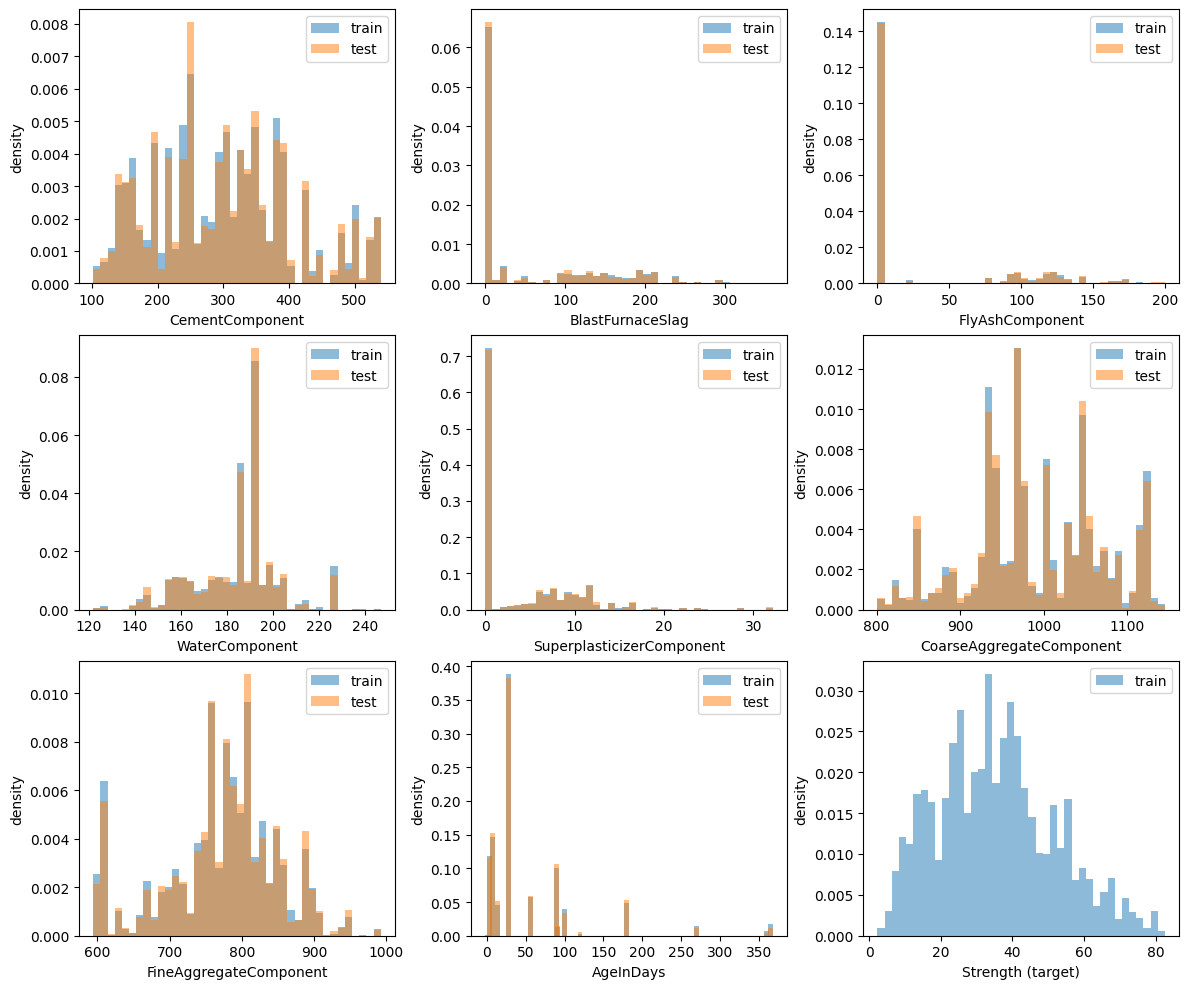

In [9]:
# Visualization

target = 'Strength'
def analyze(train, test, col, ax):
    bins = 40
    column = train[col]
    if col in test.columns:
        both = np.hstack([column.values, test[col].values])
    else:
        both = column
    uni = np.unique(column)
    unival = len(uni)
    if unival < bins:
        vc_tr = column.value_counts().sort_index() / len(train)
        if col in test.columns:
            vc_te = test[col].value_counts().sort_index() / len(test)
            ax.bar(vc_tr.index, vc_tr, width=6, label='train', alpha=0.5)
            ax.bar(vc_te.index, vc_te, width=6, label='test', alpha=0.5)
        else:
            ax.bar(vc_tr.index, vc_tr, label='train', alpha=0.5)
        if unival <= 12:
            ax.set_xticks(vc_tr.index)
        else:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()
    else:
        hist_bins = np.linspace(both.min(), both.max(), bins+1)
        ax.hist(column, bins=hist_bins, density=True, label='train', alpha=0.5)
        if col in test.columns:
            ax.hist(test[col], bins=hist_bins, density=True, label='test', alpha=0.5)
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()

        
_, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.ravel()
for col, ax in zip(df.columns, axs):
    analyze(df, df_test, col, ax)
plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.show()

In [10]:
# Correlation
correlation_matrix = df.corr()
correlation_matrix['Strength'].sort_values(ascending = False)

Strength                     1.000000
AgeInDays                    0.334204
SuperplasticizerComponent    0.208249
CementComponent              0.158000
BlastFurnaceSlag             0.057506
FlyAshComponent              0.031606
FineAggregateComponent      -0.073900
CoarseAggregateComponent    -0.098410
WaterComponent              -0.113678
Name: Strength, dtype: float64

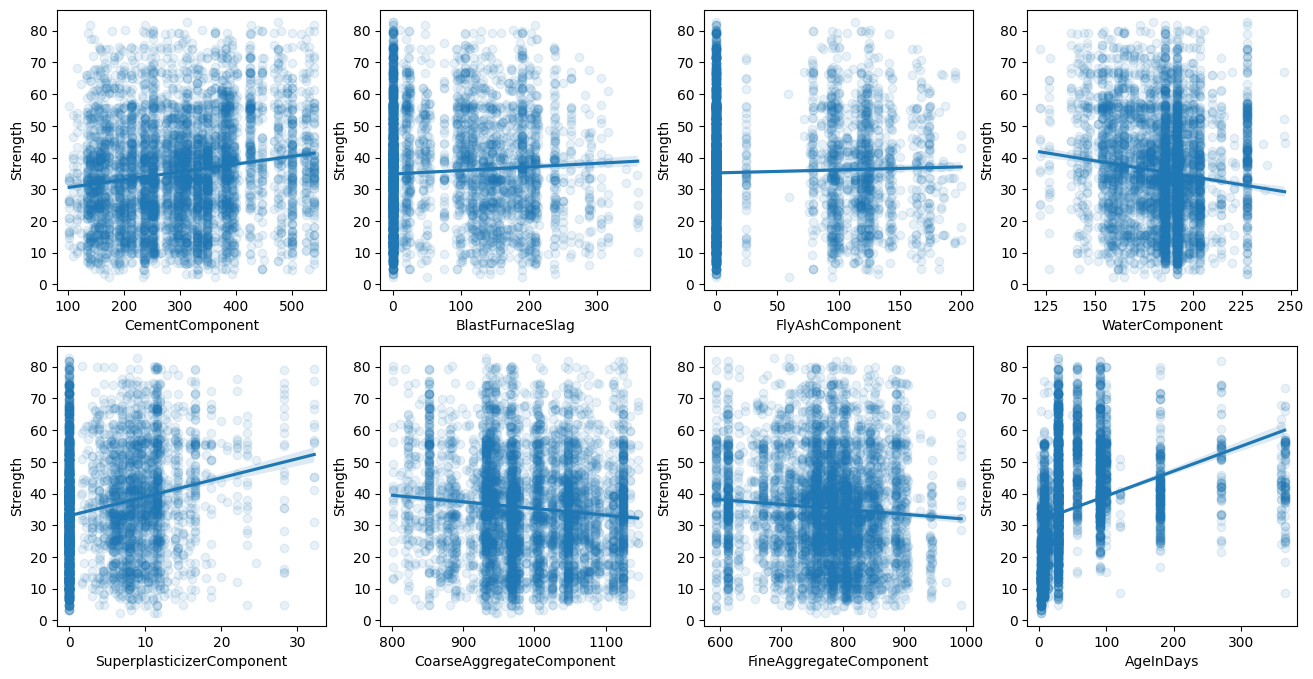

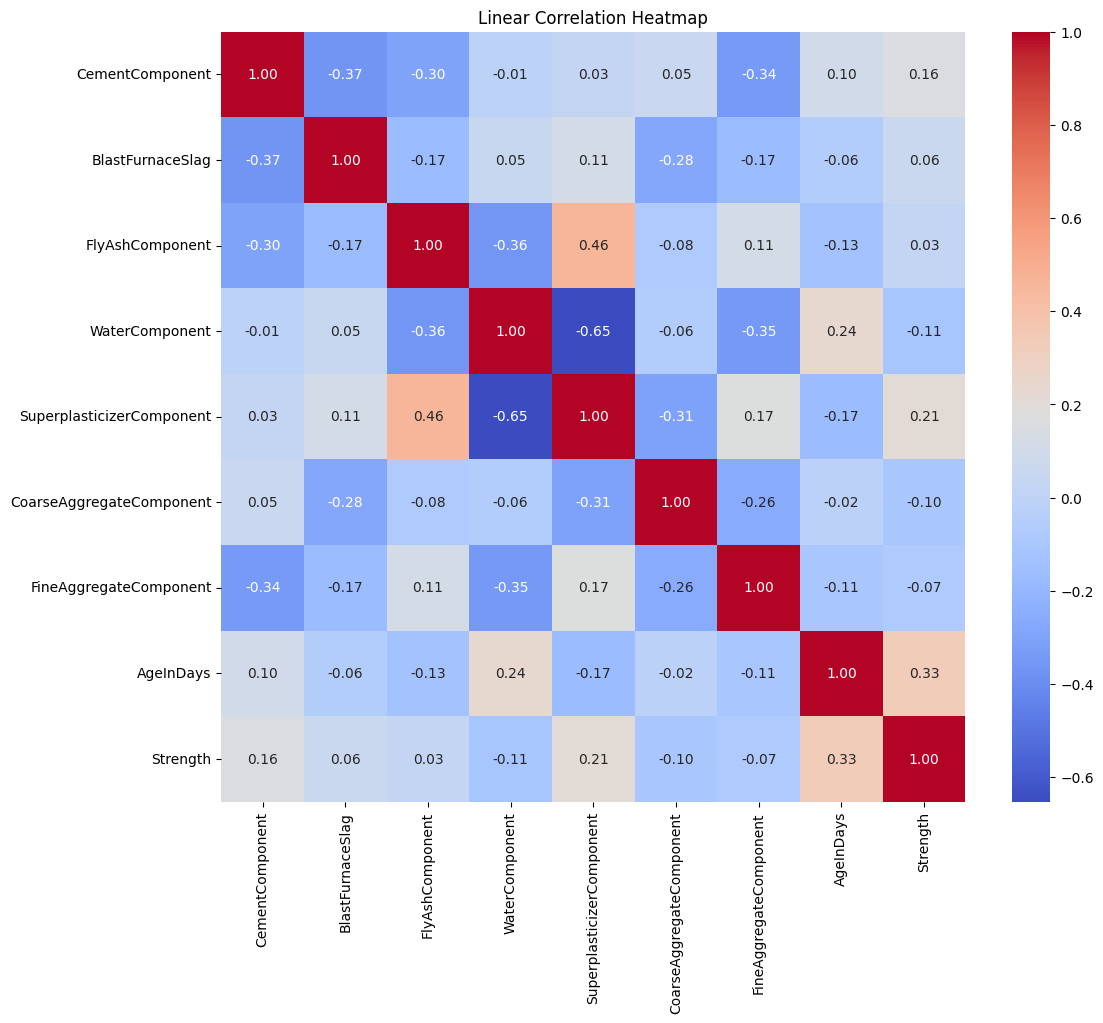

In [11]:
# Correlation

fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
feats = ['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']

for idx, feat in enumerate(feats):
  # 회귀선 + 데이터포인트
    sns.regplot(x = feat, y = df.Strength, data = df, 
              ax = axs[int(idx/4)][ idx % 4  ],
             scatter_kws={'alpha': 0.1})
    
plt.show()


# Correlation: Heat map

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Linear Correlation Heatmap')
plt.show()

# Preprocessing

In [12]:
(df == 0).sum()

# 0 O : BlastFurnaceSlag, FlyAshComponent, SuperplasticizerComponent
# 0 X : CementComponent, WaterComponent, CoarseAggregateComponent, FineAggregateComponent, AgeInDays

CementComponent                 0
BlastFurnaceSlag             3166
FlyAshComponent              3927
WaterComponent                  0
SuperplasticizerComponent    3143
CoarseAggregateComponent        0
FineAggregateComponent          0
AgeInDays                       0
Strength                        0
dtype: int64

## Feature에 따른 특징 확인

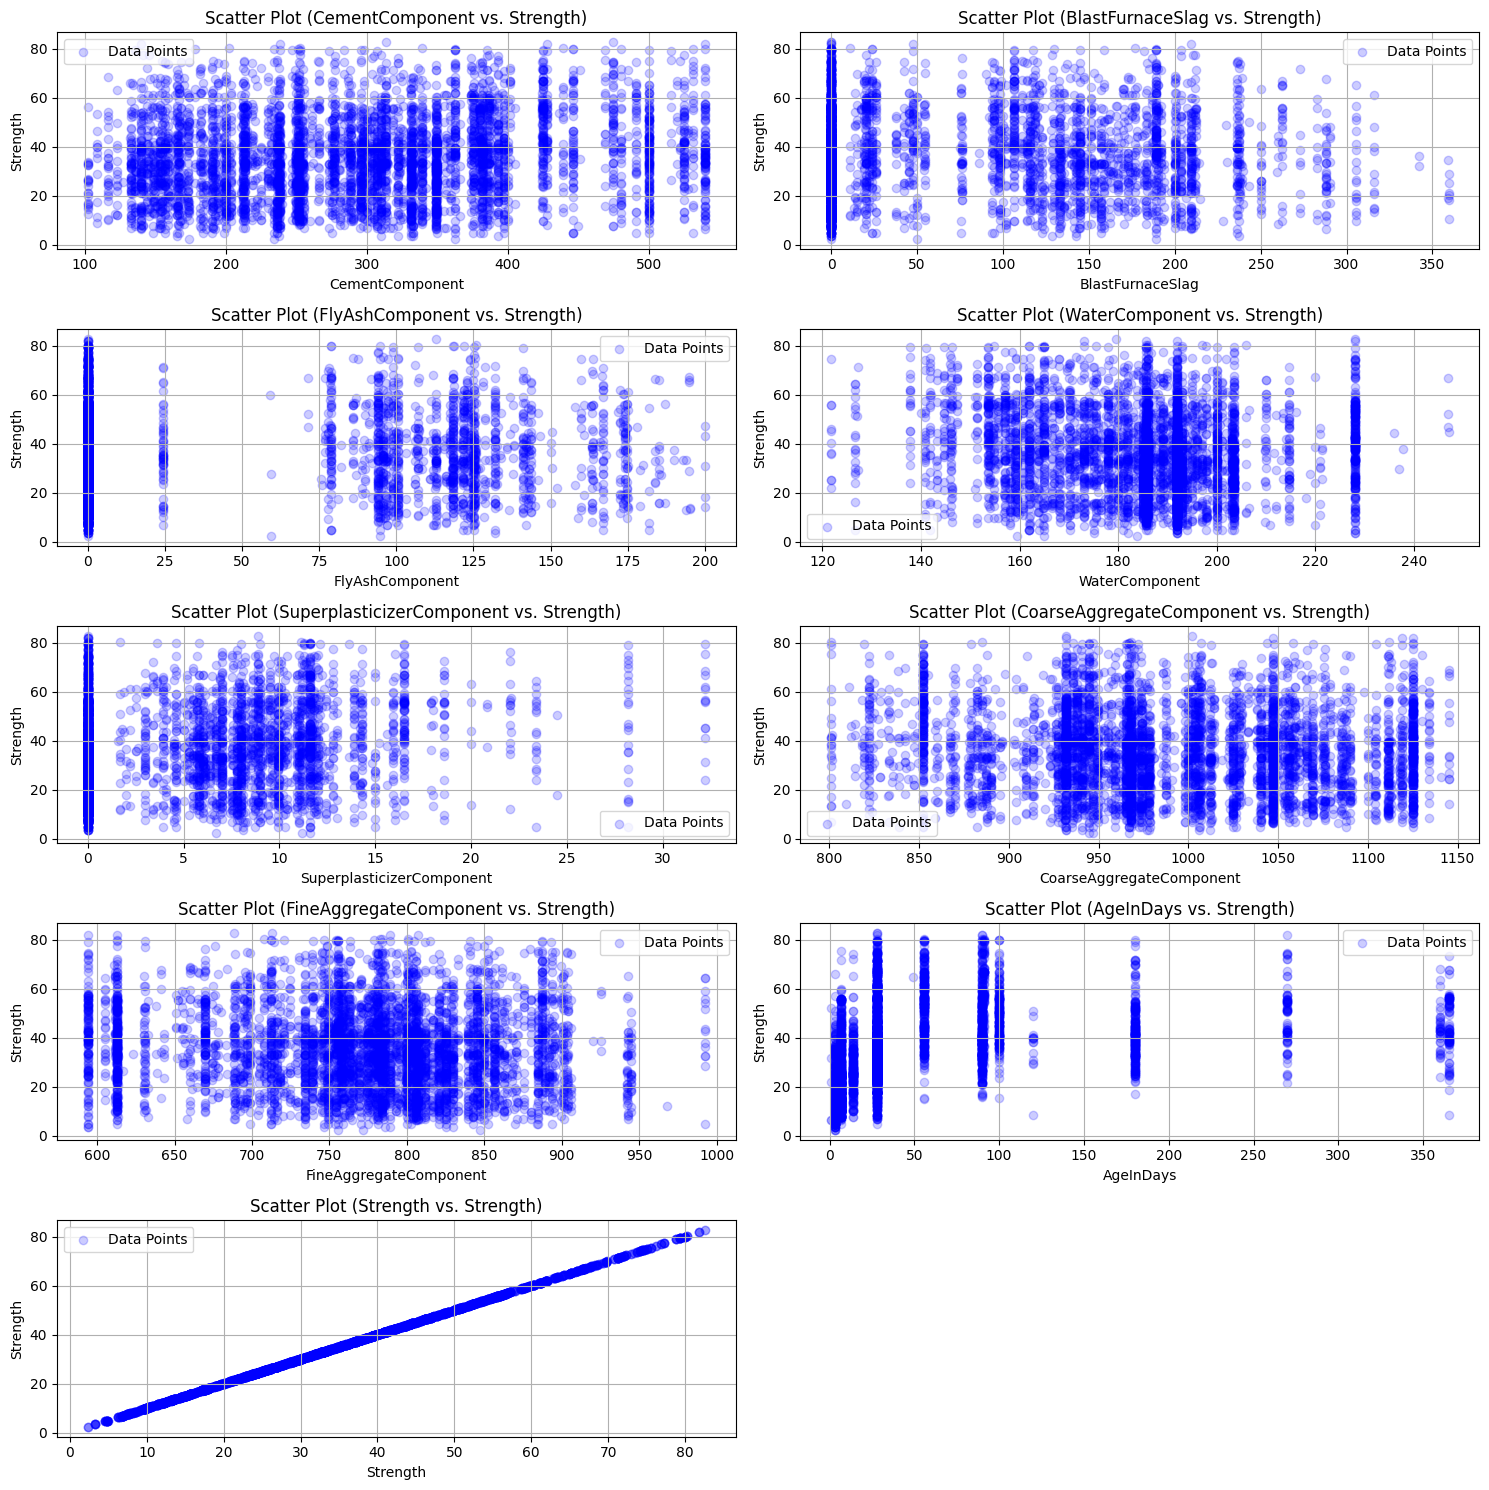

In [13]:
'''
실제 실험시 이상 적인 환경이라면 aging 시간과 strength는 2^0.5 와 비슷한 그래프를 보여준다. 
(강도의 포화점이 존재하며, 실험이 이상적으로 되었다면 curing 시간이 늘어나면 강도나 절대 낮아지지 않는다. (부식 환경 제외))

1. 75 일 이후 curing은 크게 효과가 없다. -> 75 이상은 모두 75으로 치환 (75는 그래프를 보고 찍은 값)
2. 75일 이후 20 이하의 strength는 이상치로 모두 삭제 
* 참고로 비필수 컬럼을 합쳐서 보더라도 비슷한 경향성을 유지한다.
'''

num_columns = len(df.columns)

num_rows = num_columns // 2 if num_columns % 2 == 0 else num_columns // 2 + 1
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    x = df[column].values
    y = df['Strength'].values
    
    ax = axes[i]
    
    ax.scatter(x, y, color='blue', marker='o', label='Data Points', alpha=0.2)

    ax.set_title(f'Scatter Plot ({column} vs. Strength)')
    ax.set_xlabel(column)
    ax.set_ylabel('Strength')
    ax.legend()
    ax.grid(True)

if num_columns % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


## Feature별 구간에 따른 추세

In [14]:
def my_correlation(x_column):
    x_column
    print('x_column:', x_column)

    max_value = df[x_column].max()
    min_value = df[x_column].min()
    print('max, min:', max_value, min_value)

    step_size = (max_value - min_value) / 10
    x_ticks = np.arange(min_value, max_value + step_size, step_size)

    if len(x_ticks) > 11:
        x_ticks = x_ticks[:11]    
    x_ticks = np.insert(x_ticks, 0, 0)
    print('x_ticks',x_ticks)
    
    midpoints = [(x_ticks[i] + x_ticks[i + 1]) / 2 for i in range(1, len(x_ticks) - 1)] # 평균은 x_ticks[1] 부터
    midpoints = np.insert(midpoints, 0, 0).tolist()

    _0 = df[(df[x_column] == x_ticks[0])]
    _1 = df[(df[x_column] >= x_ticks[0]) & (df[x_column] < x_ticks[1])] # 부등호 주의
    _2 = df[(df[x_column] >= x_ticks[1]) & (df[x_column] < x_ticks[2])]
    _3 = df[(df[x_column] >= x_ticks[2]) & (df[x_column] < x_ticks[3])]
    _4 = df[(df[x_column] >= x_ticks[3]) & (df[x_column] < x_ticks[4])]
    _5 = df[(df[x_column] >= x_ticks[4]) & (df[x_column] < x_ticks[5])]
    _6 = df[(df[x_column] >= x_ticks[5]) & (df[x_column] < x_ticks[6])]
    _7 = df[(df[x_column] >= x_ticks[6]) & (df[x_column] < x_ticks[7])]
    _8 = df[(df[x_column] >= x_ticks[7]) & (df[x_column] < x_ticks[8])]
    _9 = df[(df[x_column] >= x_ticks[8]) & (df[x_column] < x_ticks[9])]
    _10 = df[(df[x_column] >= x_ticks[9]) & (df[x_column] < x_ticks[10])]

    avg_list = [_0['Strength'].mean(), _1['Strength'].mean(),_2['Strength'].mean(),_3['Strength'].mean(),_4['Strength'].mean(),_5['Strength'].mean()
                ,_6['Strength'].mean(),_7['Strength'].mean(),_8['Strength'].mean(),_9['Strength'].mean(),_10['Strength'].mean()]
    print('avg_list:', avg_list)

    mean_strength_dict = {midpoints[i]: avg_list[i] for i in range(len(midpoints))}
    print('mean_strength_dict:', mean_strength_dict)

    
    subsets = [_0, _1, _2, _3, _4, _5, _6, _7, _8, _9, _10]
    subset_labels = ['_0', '_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10']

    
    # box_plot
    fig, axes = plt.subplots(2, 6, figsize=(12, 6))
    axes = axes.flatten()

    for i, (subset, label) in enumerate(zip(subsets, subset_labels)):
        axes[i].boxplot(subset['Strength'])
        axes[i].set_xlabel(label)
        axes[i].set_ylabel('Strength')

    for j in range(len(subsets), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    plt.show()


    # scatter plot
    x = list(map(int, mean_strength_dict.keys()))  # Convert keys to integers for plotting
    y = list(mean_strength_dict.values())

    variances = [_0['Strength'].std(),_1['Strength'].std(), _2['Strength'].std(), _3['Strength'].std(), _4['Strength'].std(), _5['Strength'].std()
                 , _6['Strength'].std(), _7['Strength'].std(), _8['Strength'].std(), _9['Strength'].std(), _10['Strength'].std()]

    plt.errorbar(x, y, yerr=variances, color='blue', marker='o', linestyle='None', capsize=5)    
    plt.scatter(x, y, color='blue', marker='o')

    plt.ylim(0, 60)

    plt.title('Scatter Plot of mean_strength_dict')
    plt.xlabel(x_column)
    plt.ylabel('Strength')

    plt.show()
    
    return mean_strength_dict

x_column: CementComponent
max, min: 540.0 102.0
x_ticks [  0.  102.  145.8 189.6 233.4 277.2 321.  364.8 408.6 452.4 496.2 540. ]
avg_list: [nan, nan, 31.54996825396826, 33.95964346349745, 33.727938808373594, 33.6466401816118, 34.59309973045822, 33.609789964994164, 38.59743471582181, 45.78270588235294, 44.456875]
mean_strength_dict: {0.0: nan, 123.9: nan, 167.70000000000002: 31.54996825396826, 211.50000000000003: 33.95964346349745, 255.30000000000004: 33.727938808373594, 299.1: 33.6466401816118, 342.9000000000001: 34.59309973045822, 386.70000000000005: 33.609789964994164, 430.5000000000001: 38.59743471582181, 474.30000000000007: 45.78270588235294, 518.1000000000001: 44.456875}


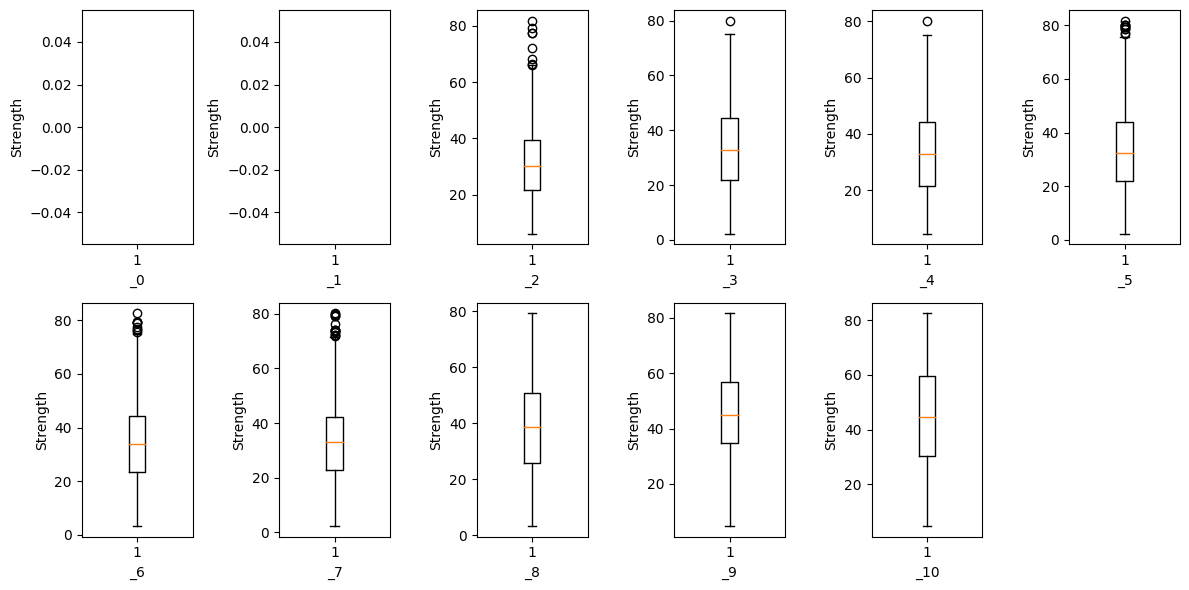

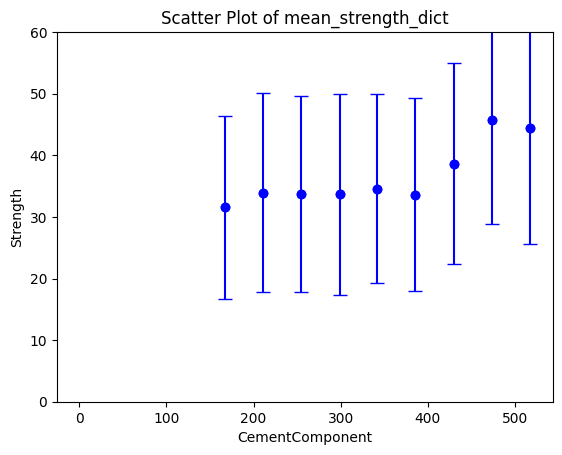

x_column: BlastFurnaceSlag
max, min: 359.4 0.0
x_ticks [  0.     0.    35.94  71.88 107.82 143.76 179.7  215.64 251.58 287.52
 323.46 359.4 ]
avg_list: [33.73419772583702, nan, 34.30785254534816, 40.53386206896552, 42.86315254237289, 36.39944572748268, 34.3927012987013, 37.65172413793104, 36.31873949579832, 39.95883720930233, 31.094848484848487]
mean_strength_dict: {0.0: 33.73419772583702, 17.97: nan, 53.91: 34.30785254534816, 89.85: 40.53386206896552, 125.78999999999999: 42.86315254237289, 161.73: 36.39944572748268, 197.67: 34.3927012987013, 233.60999999999999: 37.65172413793104, 269.54999999999995: 36.31873949579832, 305.49: 39.95883720930233, 341.42999999999995: 31.094848484848487}


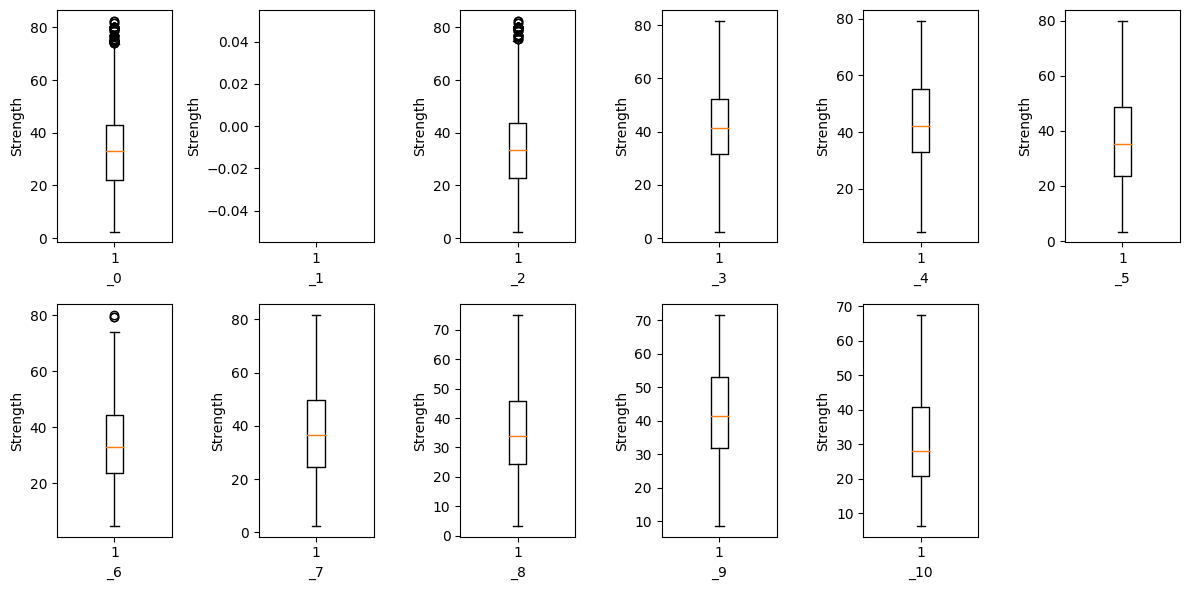

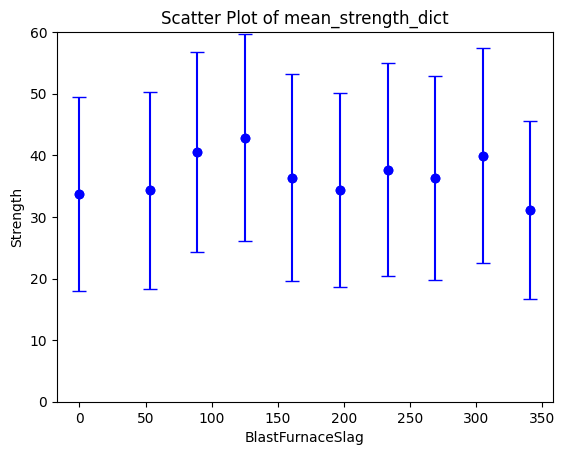

x_column: FlyAshComponent
max, min: 200.1 0.0
x_ticks [  0.     0.    20.01  40.02  60.03  80.04 100.05 120.06 140.07 160.08
 180.09 200.1 ]
avg_list: [35.04535523300229, nan, 35.04535523300229, 36.35339285714286, 29.916666666666668, 42.722235294117645, 37.317841945288755, 34.77623145400594, 36.61626702997275, 36.20521008403362, 36.30087837837838]
mean_strength_dict: {0.0: 35.04535523300229, 10.004999999999999: nan, 30.014999999999997: 35.04535523300229, 50.02499999999999: 36.35339285714286, 70.035: 29.916666666666668, 90.04499999999999: 42.722235294117645, 110.05499999999998: 37.317841945288755, 130.065: 34.77623145400594, 150.075: 36.61626702997275, 170.08499999999998: 36.20521008403362, 190.09499999999997: 36.30087837837838}


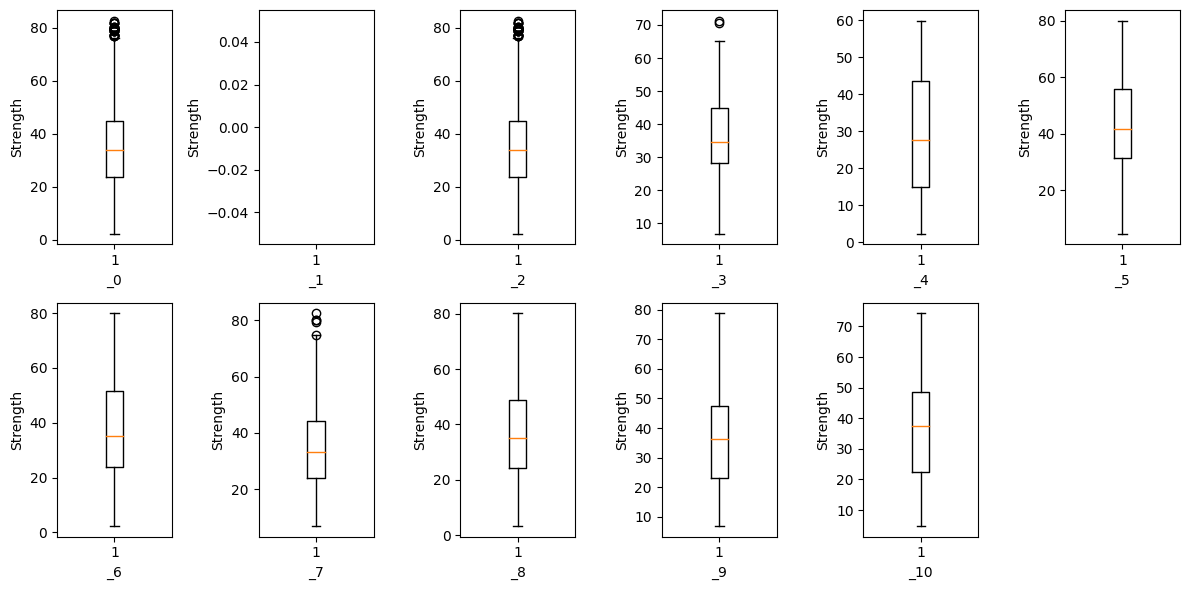

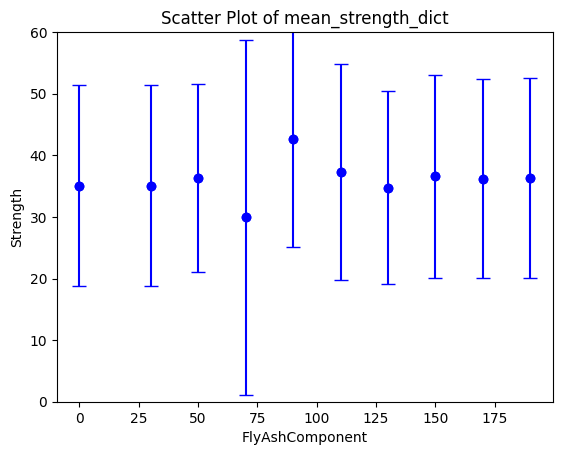

x_column: WaterComponent
max, min: 247.0 121.8
x_ticks [  0.   121.8  134.32 146.84 159.36 171.88 184.4  196.92 209.44 221.96
 234.48 247.  ]
avg_list: [nan, nan, 41.93333333333333, 44.36049689440994, 41.973828715365244, 38.48112262521589, 36.44393538913363, 32.60902382782475, 33.958361774744034, 36.620280373831775, 40.99279527559055]
mean_strength_dict: {0.0: nan, 128.06: nan, 140.57999999999998: 41.93333333333333, 153.09999999999997: 44.36049689440994, 165.62: 41.973828715365244, 178.14: 38.48112262521589, 190.65999999999997: 36.44393538913363, 203.17999999999995: 32.60902382782475, 215.7: 33.958361774744034, 228.21999999999997: 36.620280373831775, 240.73999999999995: 40.99279527559055}


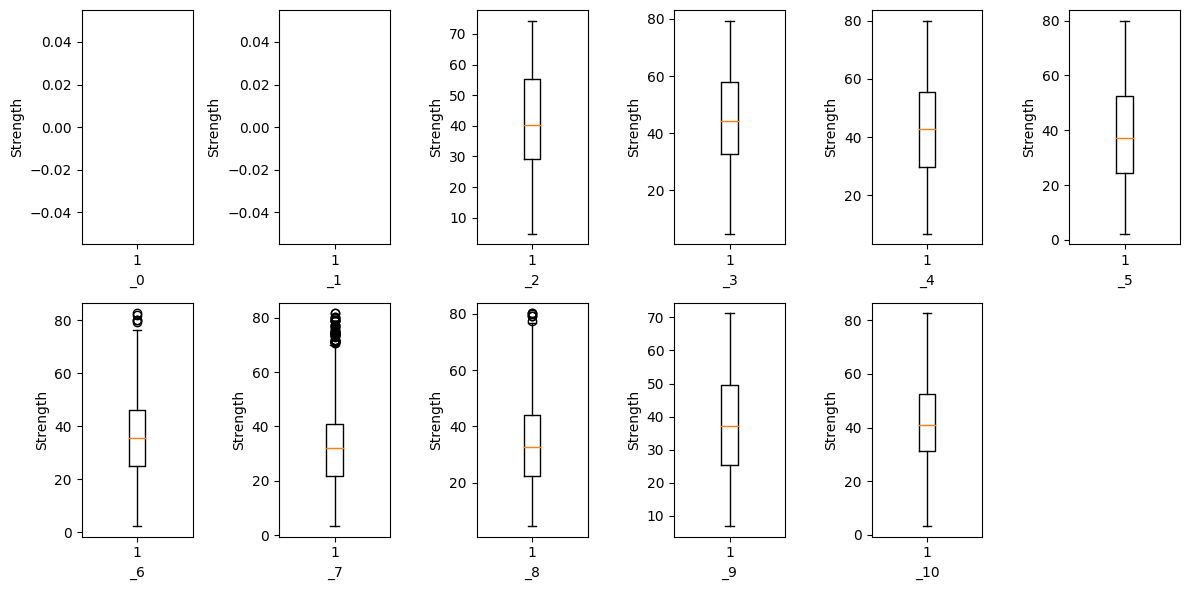

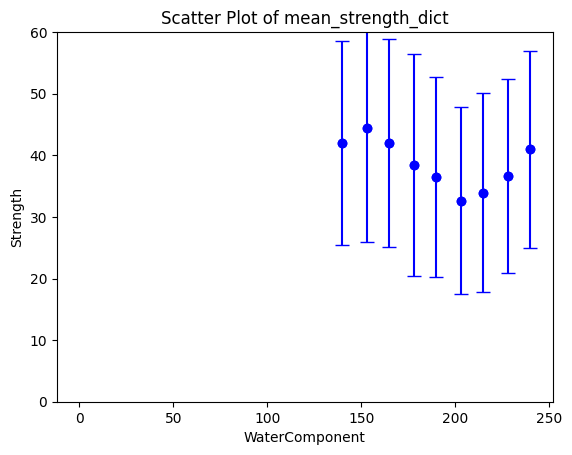

x_column: SuperplasticizerComponent
max, min: 32.2 0.0
x_ticks [ 0.    0.    3.22  6.44  9.66 12.88 16.1  19.32 22.54 25.76 28.98 32.2 ]
avg_list: [32.976589245943366, nan, 33.09151383276344, 36.541002444987775, 36.972345191040844, 39.97091042584435, 39.323040540540546, 47.7016814159292, 48.477391304347826, 41.7805, 46.85913043478261]
mean_strength_dict: {0.0: 32.976589245943366, 1.61: nan, 4.83: 33.09151383276344, 8.05: 36.541002444987775, 11.27: 36.972345191040844, 14.490000000000002: 39.97091042584435, 17.71: 39.323040540540546, 20.93: 47.7016814159292, 24.150000000000002: 48.477391304347826, 27.37: 41.7805, 30.590000000000003: 46.85913043478261}


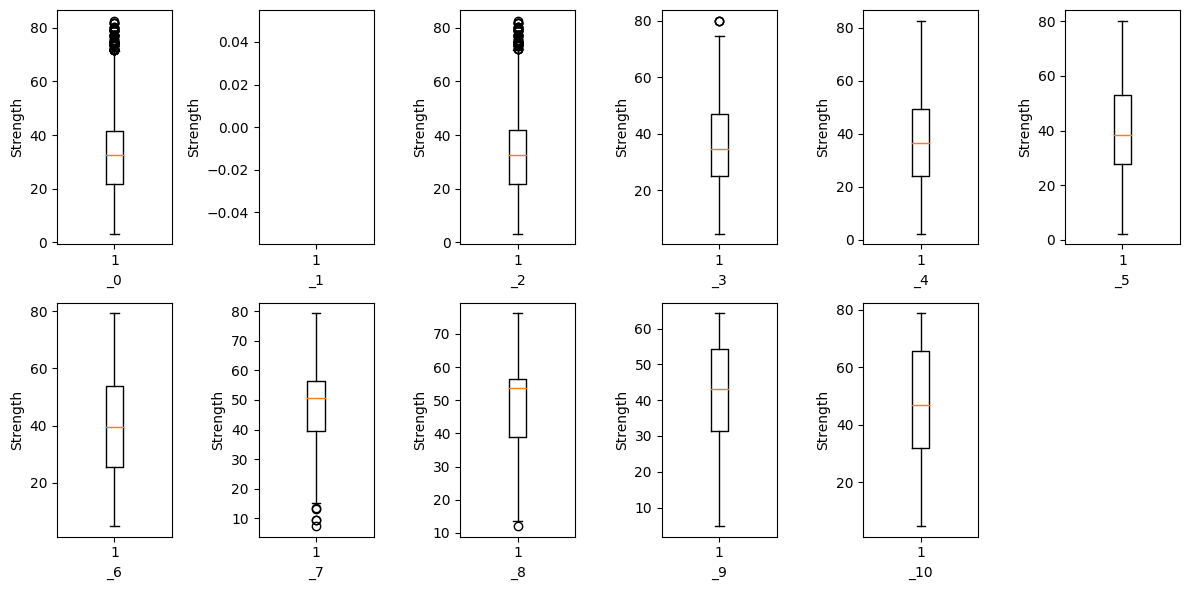

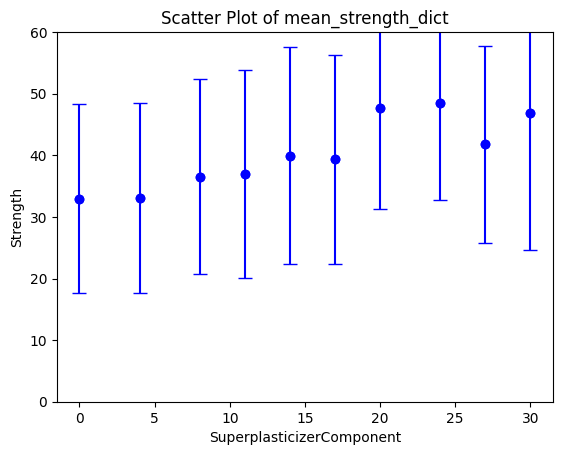

x_column: CoarseAggregateComponent
max, min: 1145.0 801.0
x_ticks [   0.   801.   835.4  869.8  904.2  938.6  973.  1007.4 1041.8 1076.2
 1110.6 1145. ]
avg_list: [nan, nan, 40.787209302325586, 43.381033210332106, 33.75523012552301, 37.7299860724234, 35.354878472222225, 34.26174211248285, 33.72646934460888, 34.23408, 31.314580152671756]
mean_strength_dict: {0.0: nan, 818.2: nan, 852.5999999999999: 40.787209302325586, 887.0: 43.381033210332106, 921.3999999999999: 33.75523012552301, 955.8: 37.7299860724234, 990.1999999999998: 35.354878472222225, 1024.6: 34.26174211248285, 1058.9999999999998: 33.72646934460888, 1093.3999999999999: 34.23408, 1127.7999999999997: 31.314580152671756}


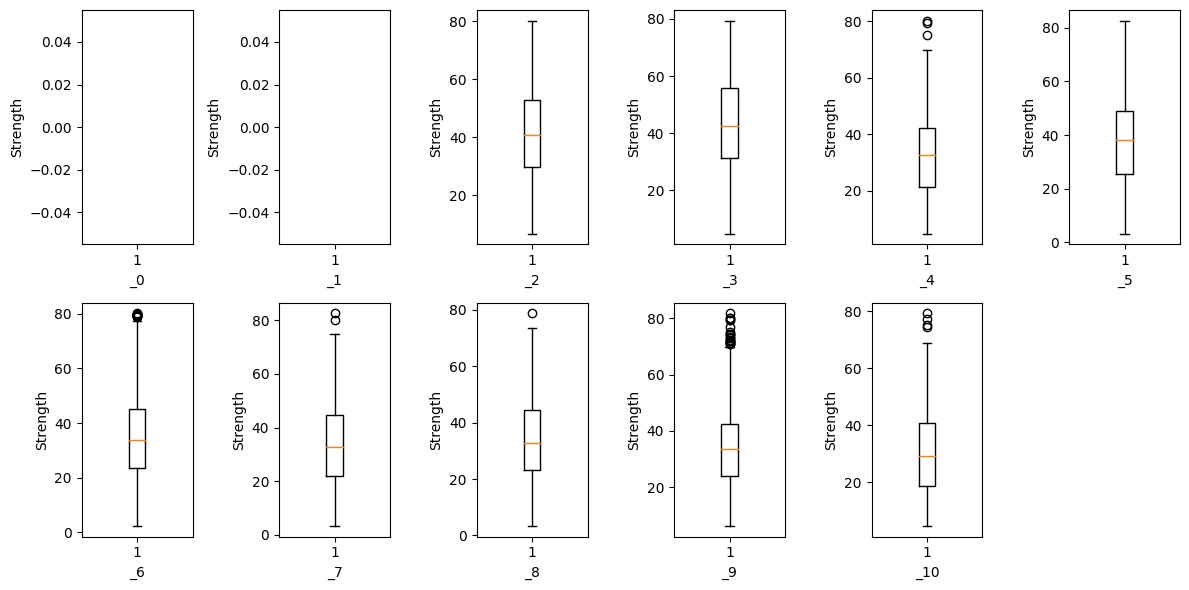

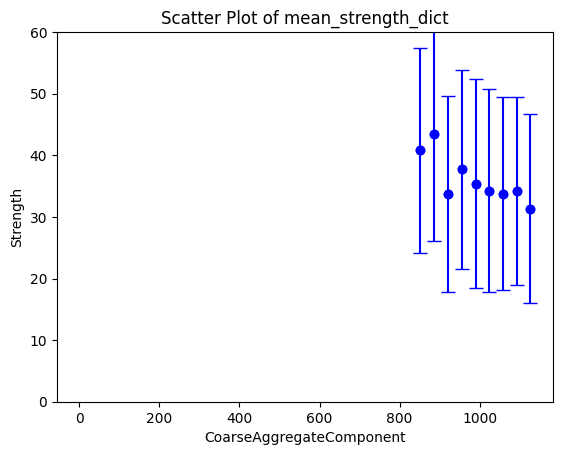

x_column: FineAggregateComponent
max, min: 992.6 594.0
x_ticks [  0.   594.   633.86 673.72 713.58 753.44 793.3  833.16 873.02 912.88
 952.74 992.6 ]
avg_list: [nan, nan, 37.855594795539034, 40.720904255319155, 37.24906565656566, 34.99006872852234, 35.85493434692467, 32.56279050736497, 34.90536028119508, 37.70096103896104, 28.974]
mean_strength_dict: {0.0: nan, 613.9300000000001: nan, 653.79: 37.855594795539034, 693.6500000000001: 40.720904255319155, 733.51: 37.24906565656566, 773.3700000000001: 34.99006872852234, 813.23: 35.85493434692467, 853.0900000000001: 32.56279050736497, 892.95: 34.90536028119508, 932.8100000000002: 37.70096103896104, 972.6700000000001: 28.974}


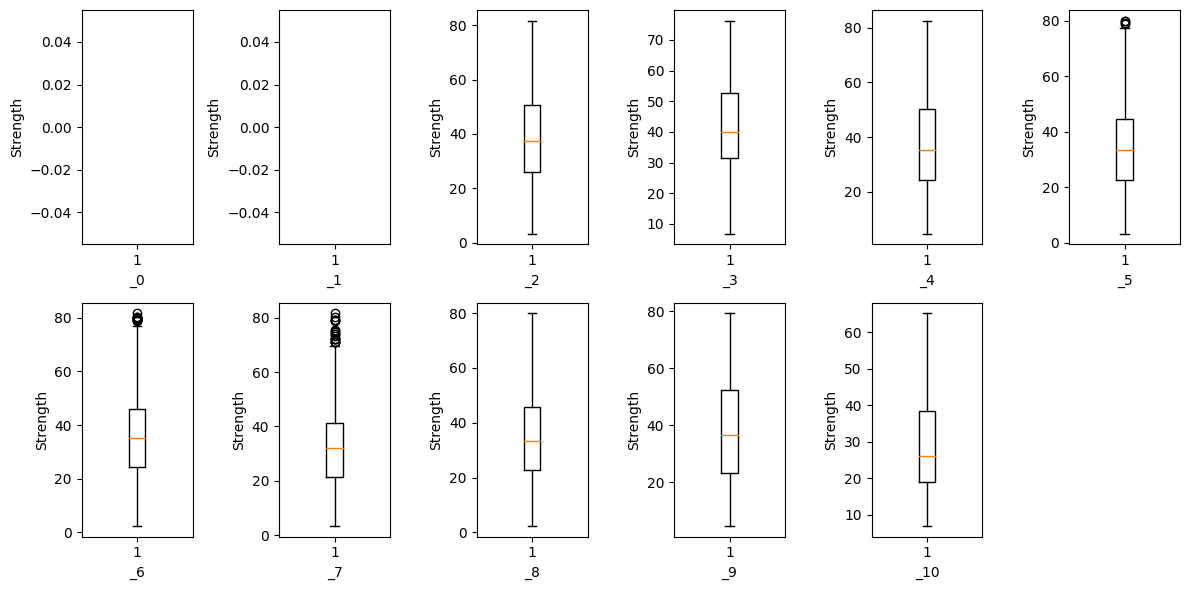

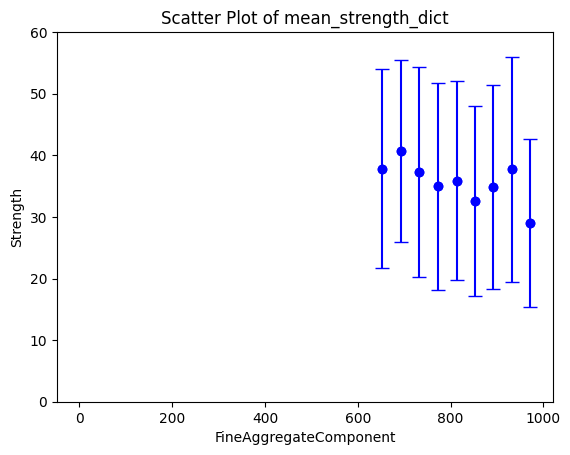

x_column: AgeInDays
max, min: 365 1
x_ticks [  0.    1.   37.4  73.8 110.2 146.6 183.  219.4 255.8 292.2 328.6 365. ]
avg_list: [nan, nan, 30.80388008452192, 52.27614649681529, 45.923018181818186, 36.51933333333333, 41.315113636363634, nan, nan, 48.848000000000006, nan]
mean_strength_dict: {0.0: nan, 19.2: nan, 55.599999999999994: 30.80388008452192, 92.0: 52.27614649681529, 128.39999999999998: 45.923018181818186, 164.8: 36.51933333333333, 201.2: 41.315113636363634, 237.59999999999997: nan, 274.0: nan, 310.4: 48.848000000000006, 346.79999999999995: nan}


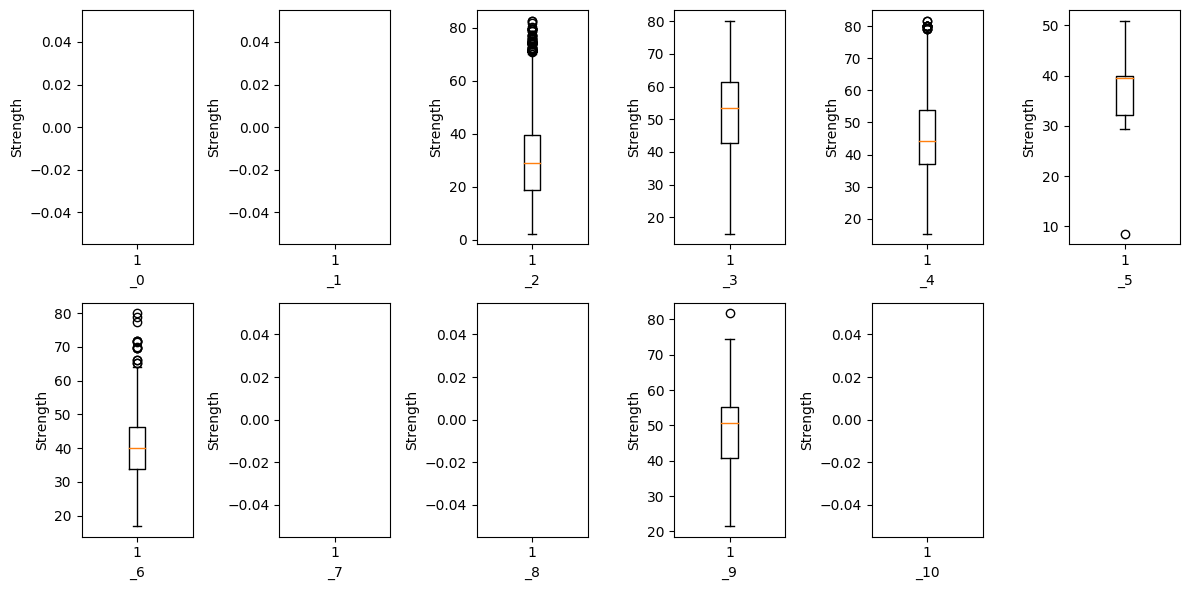

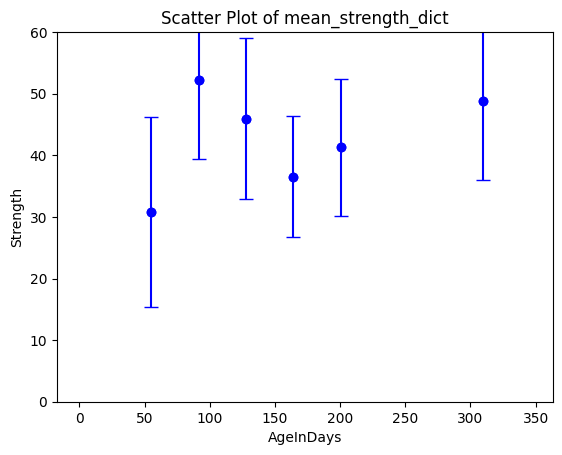

x_column: Strength
max, min: 82.6 2.33
x_ticks [ 0.     2.33  10.357 18.384 26.411 34.438 42.465 50.492 58.519 66.546
 74.573 82.6  ]
avg_list: [nan, nan, 8.052538461538461, 14.620425844346547, 23.26429761904762, 31.010031578947366, 38.614130643611915, 45.971468531468524, 54.02606946983546, 62.04615969581749, 69.93088397790055]
mean_strength_dict: {0.0: nan, 6.3435: nan, 14.3705: 8.052538461538461, 22.397499999999997: 14.620425844346547, 30.424499999999995: 23.26429761904762, 38.451499999999996: 31.010031578947366, 46.4785: 38.614130643611915, 54.50549999999999: 45.971468531468524, 62.53249999999999: 54.02606946983546, 70.55949999999999: 62.04615969581749, 78.5865: 69.93088397790055}


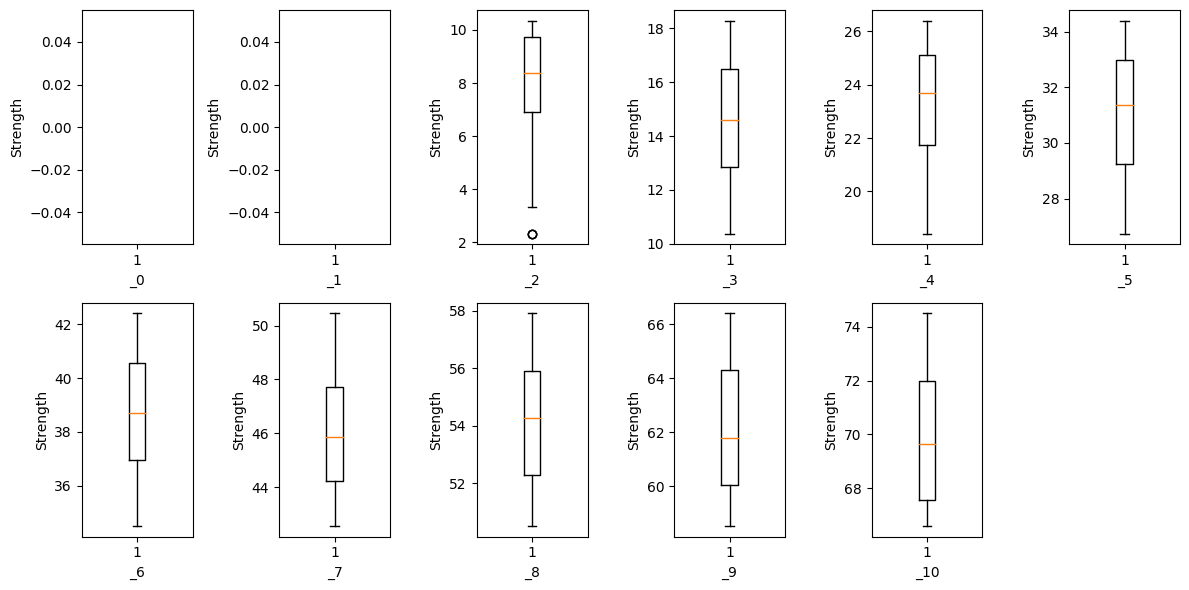

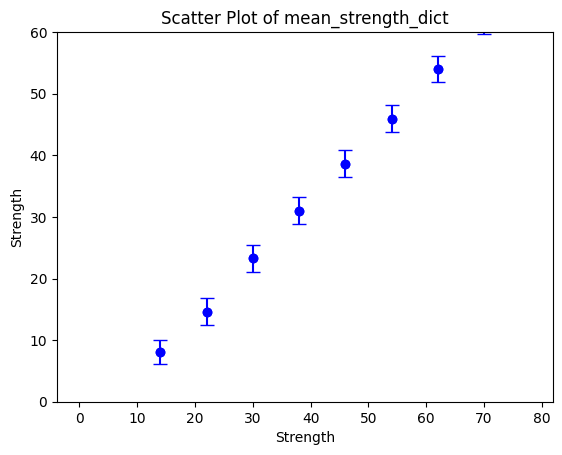

In [15]:
'''
필수요소:  [CementComponent, WaterComponent, CoarseAggregateComponent, FineAggregateComponent, AgeInDays]
- CementComponent: 400 이하 동일 처리
- WaterComponent : 2 차원
- CoarseAggregateComponent : 유지
- FineAggregateComponent : 삭제
- AgeInDay : 75 일 이후 curing은 크게 효과가 없다. -> 75 이상은 모두 75으로 치환 (75는 그래프를 보고 찍은 값)


보조요소 : [BlastFurnaceSlag, FlyAshComponent, SuperplasticizerComponent]
- BlastFurnaceSlag: 0, 1
- FlyAshComponent : 삭제
- SuperplasticizerComponent : 유지
'''

for columns in df.columns:
    my_correlation(columns)

## 경향성에 따른 df 전처리

In [45]:
df = pd.read_csv('/kaggle/input/playground-series-s3e9/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e9/test.csv')

In [46]:
'''
필수요소:  [CementComponent, WaterComponent, CoarseAggregateComponent, FineAggregateComponent, AgeInDays]
- CementComponent: 400 이하 동일 처리
- WaterComponent : 2 차원
- CoarseAggregateComponent : 유지
- FineAggregateComponent : 삭제
- AgeInDay : 75 일 이후 curing은 크게 효과가 없다. -> 75 이상은 모두 75으로 치환 (75는 그래프를 보고 찍은 값)


보조요소 : [BlastFurnaceSlag, FlyAshComponent, SuperplasticizerComponent]
- BlastFurnaceSlag: 0, 1
- FlyAshComponent : 삭제
- SuperplasticizerComponent : 유지
'''

def df_pp(df):
    # 1. 조건 설정
    df.loc[:,'CementComponent'] = df['CementComponent'].apply(lambda x: 400 if x <= 400 else x)
    df.loc[:,'WaterComponent'] = df['WaterComponent'].apply(lambda x: 160 if x <= 160 else x)
    df.loc[:,'CoarseAggregateComponent'] = df['CoarseAggregateComponent'].apply(lambda x: x)
    df.loc[:,'FineAggregateComponent'] = df['FineAggregateComponent'].apply(lambda x: x)
    df.loc[:,'AgeInDays'] = df['AgeInDays'].apply(lambda x: 75 if x >= 75 else x)
    df.loc[:,'BlastFurnaceSlag'] = df['BlastFurnaceSlag'].apply(lambda x: 1 if x > 0 else x)
    df.loc[:,'FlyAshComponent'] = df['FlyAshComponent'].apply(lambda x: x)
    df.loc[:,'SuperplasticizerComponent'] = df['SuperplasticizerComponent'].apply(lambda x: x)
    
    
    # 2. 75일 이상에서 strength 20 이하 모두 삭제
    df = df[~((df['AgeInDays'] >= 75) & (df['Strength'] <= 20))]
    
    # 3. 차원 감소
    df_pp = df.drop(columns=['FineAggregateComponent', 'FlyAshComponent'])
    
    return df_pp

In [47]:
def df_test_pp(df):
    # 1. 조건 설정
    df.loc[:,'CementComponent'] = df['CementComponent'].apply(lambda x: 400 if x <= 400 else x)
    df.loc[:,'WaterComponent'] = df['WaterComponent'].apply(lambda x: 160 if x <= 160 else x)
    df.loc[:,'CoarseAggregateComponent'] = df['CoarseAggregateComponent'].apply(lambda x: x)
    df.loc[:,'FineAggregateComponent'] = df['FineAggregateComponent'].apply(lambda x: x)
    df.loc[:,'AgeInDays'] = df['AgeInDays'].apply(lambda x: 75 if x >= 75 else x)
    df.loc[:,'BlastFurnaceSlag'] = df['BlastFurnaceSlag'].apply(lambda x: 1 if x > 0 else x)
    df.loc[:,'FlyAshComponent'] = df['FlyAshComponent'].apply(lambda x: x)
    df.loc[:,'SuperplasticizerComponent'] = df['SuperplasticizerComponent'].apply(lambda x: x)
    
    
    # 2. 75일 이상에서 strength 20 이하 모두 삭제
    # df = df[~((df['AgeInDays'] >= 75) & (df['Strength'] <= 20))]
    
    # 3. 차원 감소
    df_pp = df.drop(columns=['FineAggregateComponent', 'FlyAshComponent'])
    
    return df_pp

In [48]:
df_pp = df_pp(df)
df_pp

,id,CementComponent,BlastFurnaceSlag,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,186.0,0.0,1125.0,3,10.38
1,1,400.0,1.0,191.0,8.0,967.0,28,23.52
2,2,400.0,1.0,185.7,0.0,1075.0,28,36.96
3,3,400.0,1.0,228.0,0.0,932.0,75,39.05
4,4,400.0,1.0,192.0,0.0,935.4,75,74.19
...,...,...,...,...,...,...,...,...
5402,5402,446.0,1.0,162.0,11.6,967.0,3,15.42
5403,5403,400.0,0.0,203.0,0.0,974.0,75,49.20
5404,5404,400.0,0.0,185.7,0.0,1076.2,28,39.30
5405,5405,400.0,1.0,162.6,11.5,955.8,28,39.61


In [49]:
df_test_pp = df_test_pp(df_test)
df_test_pp

,id,CementComponent,BlastFurnaceSlag,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,AgeInDays
0,5407,400.0,1.0,173.8,4.6,1007.2,56
1,5408,400.0,0.0,190.0,0.0,998.0,7
2,5409,400.0,0.0,185.0,0.0,1113.0,28
3,5410,400.0,0.0,188.5,6.4,1028.4,75
4,5411,400.0,1.0,176.0,6.0,1021.0,28
...,...,...,...,...,...,...,...
3600,9007,400.0,1.0,200.0,7.0,864.0,28
3601,9008,400.0,0.0,186.0,0.0,1104.0,28
3602,9009,400.0,1.0,194.0,7.0,924.0,28
3603,9010,469.0,1.0,160.0,32.2,852.1,3


> 

# Train/Valid/Test

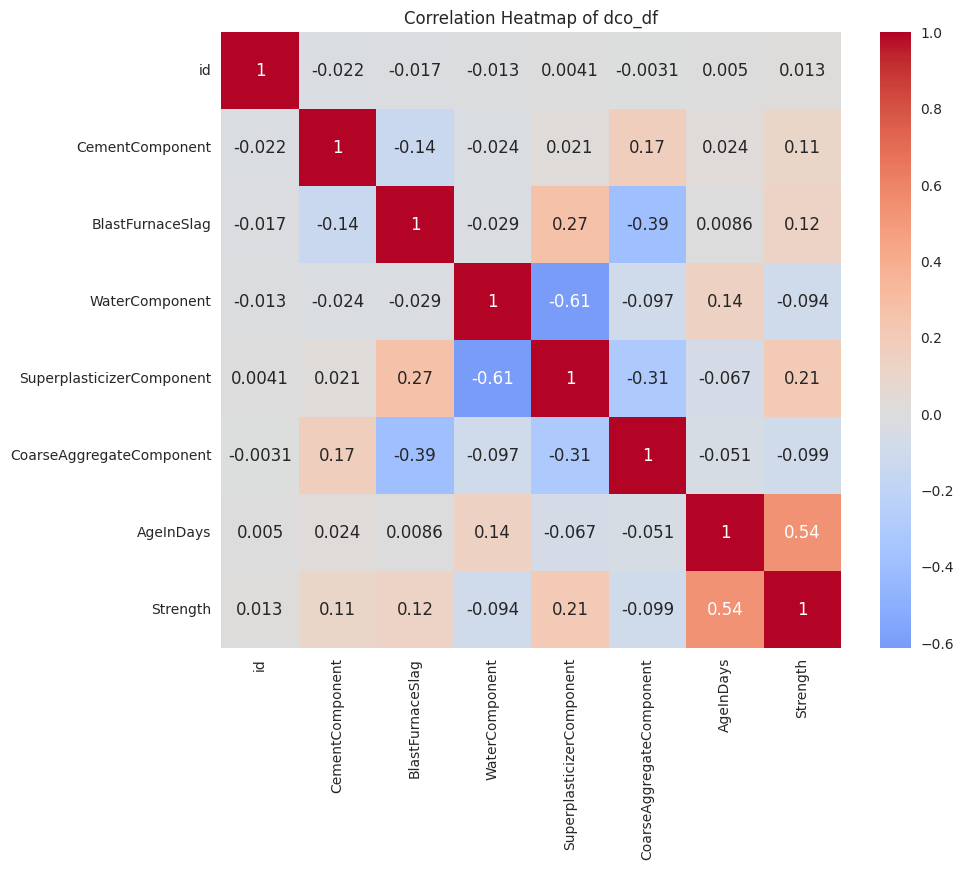

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_pp.corr(), annot=True, cmap='coolwarm', center=0)

# Add labels and title
plt.title('Correlation Heatmap of dco_df')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

X = df_pp.drop(columns=['Strength'])
y = df_pp['Strength']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = df_test_pp

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape

((4317, 7), (1080, 7), (4317,), (1080,), (3605, 7))

In [52]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
# X_valid_scaled = scaler_X.transform(X_valid) 
print(X_train_scaled.shape)
print(X_train_scaled)

(4317, 7)
[[ 0.92148566 -0.35147812 -0.83722496 ... -0.71844213  1.98882844
  -1.04145928]
 [ 0.05902144 -0.35147812 -0.83722496 ... -0.71844213  0.7204325
   1.54554185]
 [-1.34673743 -0.35147812 -0.83722496 ... -0.71844213  0.7204325
  -0.24253246]
 ...
 [ 1.61633769 -0.35147812 -0.83722496 ... -0.71844213  0.83691784
  -1.19363581]
 [ 1.72165722  2.7819108  -0.83722496 ... -0.71844213  1.72997212
  -1.19363581]
 [-1.19325348 -0.35147812  1.19442211 ...  0.96956213  0.20530843
   1.54554185]]


# Training

## Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lr = LinearRegression()
results_lr = model_lr.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid) # adjust scaler to X_validation
prediction_lr = results_lr.predict(X_valid_scaled)

mse_lr = mean_squared_error(y_valid, prediction_lr)
rmse_lr = np.sqrt(mse_lr)
print("Mean Squared Error_lr:", rmse_lr)

# Results : Mean Squared Error_lr: 14.397013420166472

Mean Squared Error_lr: 13.10816490119454


In [54]:
# Submission
X_test_scaled = scaler_X.transform(X_test) # adjust scaler to X_validation
prediction = results_lr.predict(X_test_scaled)
submission['Strength'] = prediction
submission.to_csv('submission_lr.csv', index = False)

## Polynomial Regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

degree = 2

polyreg = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())])

polyreg.fit(X_train_scaled, y_train)

X_valid_scaled = scaler_X.transform(X_valid)
y_valid_pred = polyreg.predict(X_valid_scaled)

mse_valid = mean_squared_error(y_valid, y_valid_pred)

rmse_valid = np.sqrt(mse_valid)

print(f'Root Mean Squared Error on Validation Data: {rmse_valid:.2f}')

Root Mean Squared Error on Validation Data: 12.30


In [56]:
# Submission
X_test_scaled = scaler_X.transform(X_test)
y_test_pred = polyreg.predict(X_test_scaled)
submission['Strength'] = y_test_pred
submission.to_csv('submission_polyreg.csv', index=False)

# Results : private: 13.2849, public: 12.89187

## AutoML_파이캐럿

In [28]:
!pip install -q pycaret

In [29]:
!pip install -q catboost

In [30]:
!pip install --upgrade -q xgboost

In [31]:
from pycaret.regression import *

In [57]:
reg = setup(data = X_train, 
            target = y_train, 
            verbose = True, 
            train_size = 0.9, 
            data_split_shuffle = True, 
            normalize = True, 
            session_id = 100)

,Description,Value
0,Session id,100
1,Target,Strength
2,Target type,Regression
3,Original data shape,"(4317, 8)"
4,Transformed data shape,"(4317, 8)"
5,Transformed train set shape,"(3885, 8)"
6,Transformed test set shape,"(432, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [58]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [59]:
top6_models = compare_models(fold = 10, round = 10, n_select = 6, errors = 'ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.5586279372,153.5716292096,12.3829283266,0.4364764081,0.3823744471,0.3605946627,0.3610000000
lightgbm,Light Gradient Boosting Machine,9.7602403809,161.0278230629,12.6781028597,0.4083496518,0.3869506169,0.3617332677,1.0050000000
catboost,CatBoost Regressor,9.7426338876,161.2145001716,12.6889480631,0.4079616923,0.3892472385,0.3636195769,1.3200000000
ada,AdaBoost Regressor,10.2601681619,163.1714988367,12.7673017045,0.4006504025,0.4069442378,0.4133890771,0.0990000000
br,Bayesian Ridge,10.3600941734,175.1067998717,13.2235004315,0.3573013041,0.4209599238,0.4158183940,0.1560000000
ridge,Ridge Regression,10.3593133385,175.1067893264,13.2234797778,0.3572951833,0.4207445098,0.4154666534,0.0520000000
lr,Linear Regression,10.3592491100,175.1069703007,13.2234849214,0.3572939674,0.4207256557,0.4154357656,0.0520000000
lar,Least Angle Regression,10.3592491100,175.1069703007,13.2234849214,0.3572939674,0.4207256557,0.4154357656,0.0510000000
huber,Huber Regressor,10.2746547491,176.8811101428,13.2888468597,0.3508611672,0.4129210255,0.3936966298,0.1550000000
rf,Random Forest Regressor,10.2799233641,177.3437580247,13.3050000078,0.3490399979,0.4040341471,0.3787182232,1.0030000000


Processing:   0%|          | 0/90 [00:00<?, ?it/s]

In [60]:
top6_models

[GradientBoostingRegressor(random_state=100),
 LGBMRegressor(random_state=100),
 AdaBoostRegressor(random_state=100),
 BayesianRidge(),
 Ridge(random_state=100)]

In [61]:
reg_blended = blend_models(estimator_list = top6_models, fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.4778,144.4269,12.0178,0.4532,0.4043,0.4088
1,10.2057,167.2598,12.9329,0.4221,0.4383,0.4510
2,9.5012,147.7938,12.1570,0.3942,0.3869,0.3739
3,9.7202,152.9941,12.3691,0.3933,0.3989,0.3859
4,10.0995,160.1643,12.6556,0.4080,0.4144,0.4107
5,10.1843,176.0362,13.2679,0.3981,0.3966,0.3732
6,9.4328,150.5609,12.2703,0.4446,0.3482,0.3170
7,9.1610,137.3972,11.7217,0.5057,0.3572,0.3357
8,9.2515,141.7198,11.9046,0.4909,0.3652,0.3502


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [62]:
model = finalize_model(reg_blended)
model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['id', 'CementComponent',
                                             'BlastFurnaceSlag',
                                             'WaterComponent',
                                             'SuperplasticizerComponent',
                                             'CoarseAggregateComponent',
                                             'AgeInDays'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequ...
                 VotingRegressor(estimators=[('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(random_state=100)),
                                             ('Light Gradient Boosting Machine',
                                              LGBMRegressor(random_state=100)),
                                             ('CatBoost Regressor',
                                              <catboost.core.CatBoostRegressor object at 0x78f59b51c610>),
                                             ('AdaBoost Regressor',
                                              AdaBoostRegressor(random_state=100)),
                                             ('Bayesian Ridge',
                                              BayesianRidge()),
                                             ('Ridge Regression',
                                              Ridge(random_state=100))],
                                 n_jobs=-1))])

In [63]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,8.2460,109.7377,10.4756,0.5238,0.3548,0.3449


,id,CementComponent,BlastFurnaceSlag,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,AgeInDays,Strength,prediction_label
4067,4067,400.0,0.0,192.000000,0.0,1047.000000,75,38.330002,43.208250
360,360,400.0,1.0,228.000000,0.0,932.000000,75,39.360001,44.744634
1419,1419,400.0,0.0,191.000000,0.0,968.000000,28,46.900002,35.247596
1430,1430,400.0,1.0,185.699997,0.0,1076.199951,28,20.590000,36.529144
4335,4335,540.0,0.0,173.000000,0.0,1125.000000,14,41.540001,33.095200
...,...,...,...,...,...,...,...,...,...
9,9,400.0,1.0,192.000000,0.0,927.400024,3,6.940000,17.950586
4563,4563,400.0,0.0,185.000000,0.0,1047.000000,14,25.889999,27.094921
2205,2205,400.0,0.0,192.000000,0.0,1025.000000,28,31.030001,33.789879
5097,5097,400.0,1.0,192.000000,0.0,978.400024,7,21.500000,20.748812


In [65]:
prediction = predict_model(model, data = X_valid)

mse_rfr = mean_squared_error(y_valid, prediction.prediction_label.values)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 11.486162186073484

Mean Squared Error_rfr: 12.320974344965537


In [66]:
# Submission
prediction = predict_model(model, data = X_test)
submission['Strength'] = prediction.prediction_label.values
submission.to_csv('submission_top6.csv', index = False)

# Results : Private-12.43458, Public-12.22144  <554>

In [39]:
!rm /kaggle/working/submission_top6.csv

rm: cannot remove '/kaggle/working/submission_top6.csv': No such file or directory
